In [4]:
import bamboolib as bam 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r"C:\Users\abhin\Downloads\letters.csv")

In [9]:
df

       label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  \
0          1        0        0        0         0         0         0   
1          0        0        0        0       137       137       192   
2          1        0        0        0         3       141       139   
3          4        0        0        0         0         0         0   
4          0        0        0        0       155       254       254   
...      ...      ...      ...      ...       ...       ...       ...   
41995      2        0        0        1       248       253       176   
41996      0        0        0        0         0         0         0   
41997      2        0        0        0       255       255       191   
41998      2        0        0        0       255       128         0   
41999      2        0        0      227       253       229       133   

       pixel127  pixel128  pixel129  ...  pixel329  pixel351  pixel410  \
0             0         0         0  ...         

In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Data columns (total 46 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   label     42000 non-null  int64
 1   pixel43   42000 non-null  int64
 2   pixel44   42000 non-null  int64
 3   pixel92   42000 non-null  int64
 4   pixel124  42000 non-null  int64
 5   pixel125  42000 non-null  int64
 6   pixel126  42000 non-null  int64
 7   pixel127  42000 non-null  int64
 8   pixel128  42000 non-null  int64
 9   pixel129  42000 non-null  int64
 10  pixel130  42000 non-null  int64
 11  pixel131  42000 non-null  int64
 12  pixel132  42000 non-null  int64
 13  pixel133  42000 non-null  int64
 14  pixel134  42000 non-null  int64
 15  pixel135  42000 non-null  int64
 16  pixel136  42000 non-null  int64
 17  pixel137  42000 non-null  int64
 18  pixel138  42000 non-null  int64
 19  pixel146  42000 non-null  int64
 20  pixel147  42000 non-null  int64
 21  pixel148  42000 non-null  int64
 22

In [12]:
df = pd.DataFrame(df)

In [13]:
df.corr

<bound method DataFrame.corr of        label  pixel43  pixel44  pixel92  pixel124  pixel125  pixel126  \
0          1        0        0        0         0         0         0   
1          0        0        0        0       137       137       192   
2          1        0        0        0         3       141       139   
3          4        0        0        0         0         0         0   
4          0        0        0        0       155       254       254   
...      ...      ...      ...      ...       ...       ...       ...   
41995      2        0        0        1       248       253       176   
41996      0        0        0        0         0         0         0   
41997      2        0        0        0       255       255       191   
41998      2        0        0        0       255       128         0   
41999      2        0        0      227       253       229       133   

       pixel127  pixel128  pixel129  ...  pixel329  pixel351  pixel410  \
0             0  

In [14]:
print('sum of duplicated values: {}'.format(df.duplicated().sum()))

sum of duplicated values: 1633


In [15]:
print('sum of null values: {}'.format(df.isnull().sum()))

sum of null values: label       0
pixel43     0
pixel44     0
pixel92     0
pixel124    0
pixel125    0
pixel126    0
pixel127    0
pixel128    0
pixel129    0
pixel130    0
pixel131    0
pixel132    0
pixel133    0
pixel134    0
pixel135    0
pixel136    0
pixel137    0
pixel138    0
pixel146    0
pixel147    0
pixel148    0
pixel149    0
pixel150    0
pixel151    0
pixel152    0
pixel153    0
pixel154    0
pixel155    0
pixel156    0
pixel157    0
pixel158    0
pixel159    0
pixel160    0
pixel327    0
pixel328    0
pixel329    0
pixel351    0
pixel410    0
pixel411    0
pixel412    0
pixel413    0
pixel414    0
pixel415    0
pixel416    0
pixel417    0
dtype: int64


In [16]:
y=df['label']
x=df.drop('label',axis=1) 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 25)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [19]:
print('Accuracy',metrics.accuracy_score(y_test,pred)*100,'%')

Accuracy 61.345238095238095 %


In [43]:
knn=KNeighborsClassifier(n_neighbors=11, weights='uniform', metric='euclidean')
knn.fit(x_train,y_train)
pred=knn.predict(x_test)

In [44]:
print('Accuracy',metrics.accuracy_score(y_test,pred)*100,'%')

Accuracy 65.04761904761904 %


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
modelRF = RandomForestClassifier(n_estimators =5000, max_depth=4,criterion ="entropy", random_state =30)
modelRF.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=5000,
                       random_state=30)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
modelRF = RandomForestClassifier(n_estimators =500, n_features = 4, max_depth=4,criterion ="entropy", random_state =30)
modelRF.fit(x_train, y_train)

TypeError: __init__() got an unexpected keyword argument 'n_features'

In [48]:
modelRF.score(x_test,y_test)

0.5479761904761905

In [62]:
rf_model = RandomForestClassifier(n_estimators = 25, min_samples_leaf = 3, random_state=42)

# Fit the model on the training data
rf_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=3, n_estimators=25, random_state=42)

In [64]:
modelRF.score(x_test,y_test)

0.5479761904761905

Feature ranking:
1. feature 36 (0.098455)
2. feature 37 (0.076322)
3. feature 33 (0.065089)
4. feature 28 (0.046951)
5. feature 38 (0.041493)
6. feature 29 (0.037616)
7. feature 34 (0.035299)
8. feature 39 (0.034595)
9. feature 26 (0.034091)
10. feature 35 (0.033028)
11. feature 41 (0.031941)
12. feature 40 (0.031168)
13. feature 32 (0.031078)
14. feature 24 (0.029929)
15. feature 25 (0.029305)
16. feature 31 (0.028263)
17. feature 30 (0.027799)
18. feature 27 (0.027009)
19. feature 23 (0.023935)
20. feature 7 (0.021851)
21. feature 22 (0.020339)
22. feature 5 (0.019875)
23. feature 4 (0.019420)
24. feature 21 (0.018551)
25. feature 6 (0.016943)
26. feature 8 (0.016795)
27. feature 3 (0.015503)
28. feature 42 (0.014821)
29. feature 9 (0.012753)
30. feature 10 (0.011056)
31. feature 20 (0.010387)
32. feature 11 (0.008453)
33. feature 43 (0.007352)
34. feature 12 (0.005632)
35. feature 19 (0.005422)
36. feature 13 (0.003775)
37. feature 14 (0.002302)
38. feature 2 (0.002256)
39. feature 

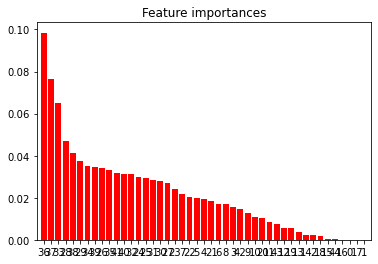

In [60]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=25, random_state=42, min_samples_leaf = 3)

# Fit the classifier on the training data
rf_clf.fit(x_train, y_train)

# Get the feature importances
importances = rf_clf.feature_importances_

# Sort the feature importances in descending order
# indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()


In [63]:
modelRF.score(x_test,y_test)

0.5479761904761905

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import tree

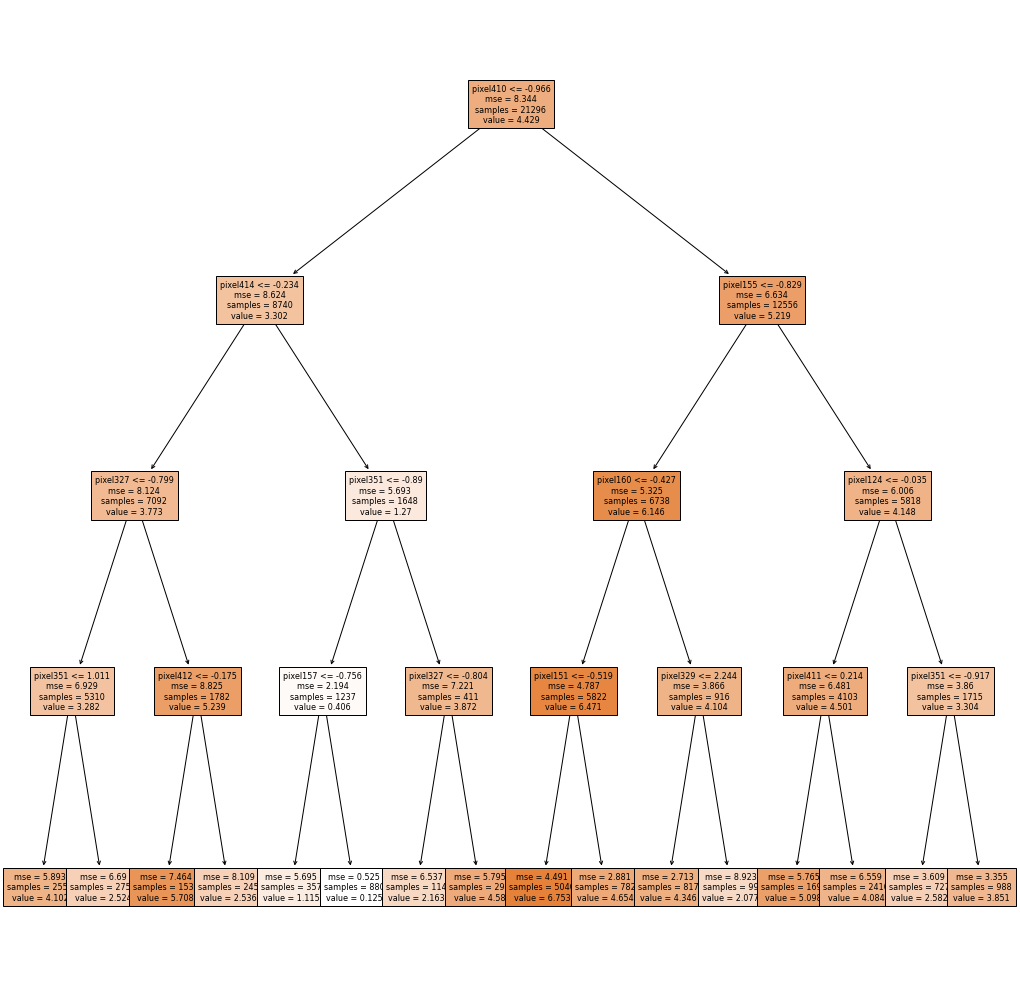

In [32]:
modelRF.estimators_[0].tree_.max_depth
rf = RandomForestRegressor(n_estimators=5000, max_depth=4)
rf.fit(x_train, y_train)
plt.figure(figsize=(18,18))
_ = tree.plot_tree(rf.estimators_[0], feature_names=x_train.columns, filled=True, fontsize =8)
plt.show()

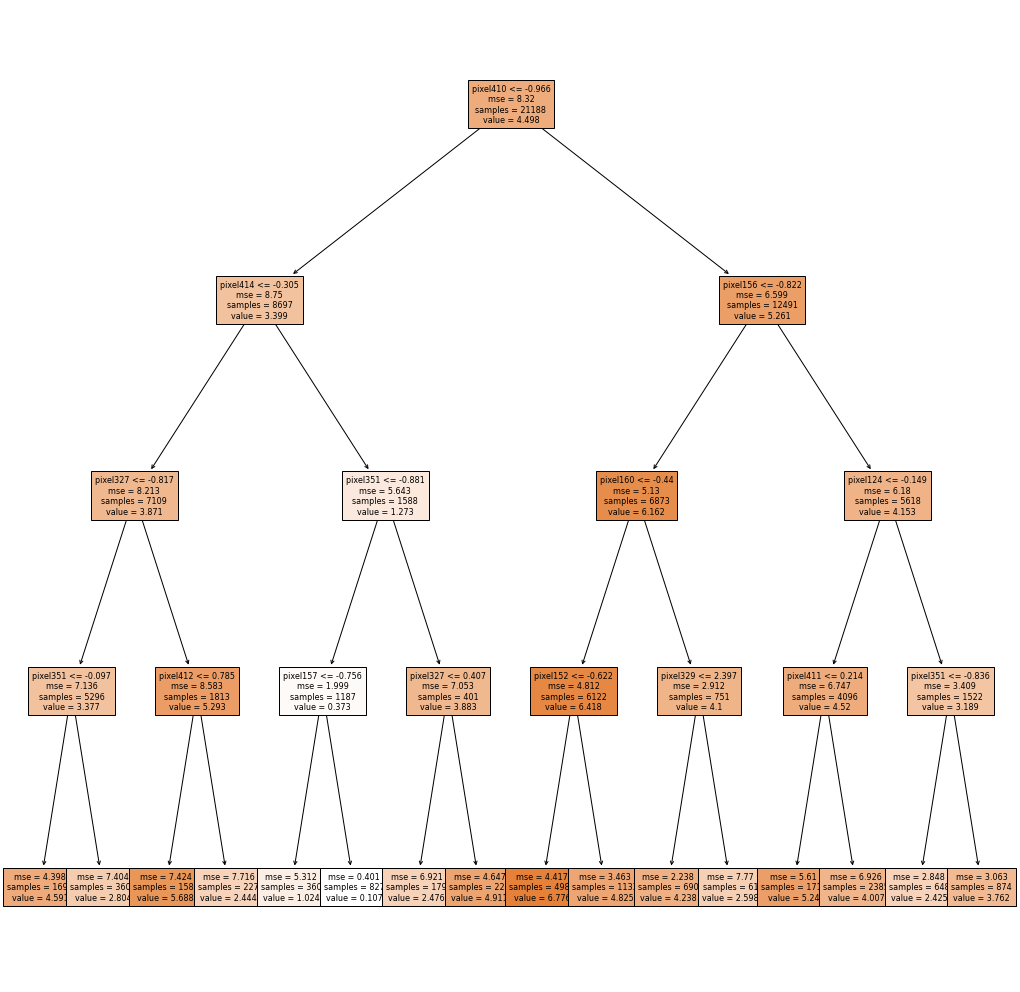

In [33]:
modelRF.estimators_[0].tree_.max_depth
rf = RandomForestRegressor(n_estimators=250, max_depth=4)
rf.fit(x_train, y_train)
plt.figure(figsize=(18,18))
_ = tree.plot_tree(rf.estimators_[0], feature_names=x_train.columns, filled=True, fontsize =8)
plt.show()

In [22]:
unscaled_features = x_train
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
x_train = pd.DataFrame(x_train_array,index= x_train.index, columns= x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array, index= x_test.index, columns= x_test.columns)

In [23]:
from sklearn.neural_network import MLPClassifier

In [24]:
mlp = MLPClassifier(3,solver='lbfgs',learning_rate_init= 0.01, max_iter= 10000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.5334523809523809

In [25]:
mlp = MLPClassifier(3,solver='sgd',learning_rate_init= 0.01, max_iter= 15000)
mlp.fit(x_train,y_train)`

0.4975

In [26]:
mlp = MLPClassifier(3,solver='sgd',learning_rate_init= 0.01, max_iter= 20000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.5005952380952381

In [21]:
mlp = MLPClassifier(3,solver='lbfgs',learning_rate_init= 0.01, max_iter= 15000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.526547619047619

In [22]:
mlp = MLPClassifier(3,solver='lbfgs',learning_rate_init= 0.01,activation = 'relu', max_iter= 10000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.5227380952380952

In [23]:
mlp = MLPClassifier(5,solver='lbfgs',learning_rate_init= 0.01,activation = 'relu', max_iter= 15000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.6172619047619048

In [24]:
mlp = MLPClassifier(5,solver='lbfgs',learning_rate_init= 0.01,activation = 'relu', max_iter= 20000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.6230952380952381

In [25]:
mlp = MLPClassifier(10,solver='lbfgs',learning_rate_init= 0.01,activation = 'relu', max_iter= 15000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.6482142857142857

In [26]:
mlp = MLPClassifier(15,solver='lbfgs',learning_rate_init= 0.01,activation = 'relu', max_iter= 15000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.68

In [27]:
mlp = MLPClassifier(20,solver='adam',learning_rate_init= 0.01,activation = 'relu', max_iter= 20000)
mlp.fit(x_train,y_train)
mlp.score(x_test,y_test)

0.6677380952380952